In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns      # For statistical data visualization
import sklearn             # For machine learning
%matplotlib inline


In [4]:
# Load data from CSV
df = pd.read_csv('HR Data.csv', encoding= 'unicode_escape')


In [5]:
df.info
df.head(5)

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
#check for null values
pd.isnull(df).sum()

ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# drop null values
df.dropna(inplace=True)

In [22]:
df.columns

Index(['ï»¿Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [40]:
from IPython.display import display, HTML

display(HTML('<h1 style="color: red; font-size: 18pt; font-weight: bold;">Count Genderwise</h1>'))



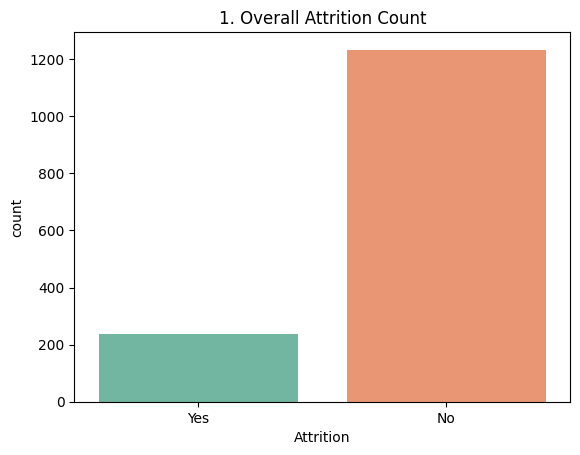

In [23]:
# 1. Overall Attrition Count
sns.countplot(data=df, x='Attrition', hue='Attrition', palette='Set2', legend=False)
plt.title("1. Overall Attrition Count")
plt.show()

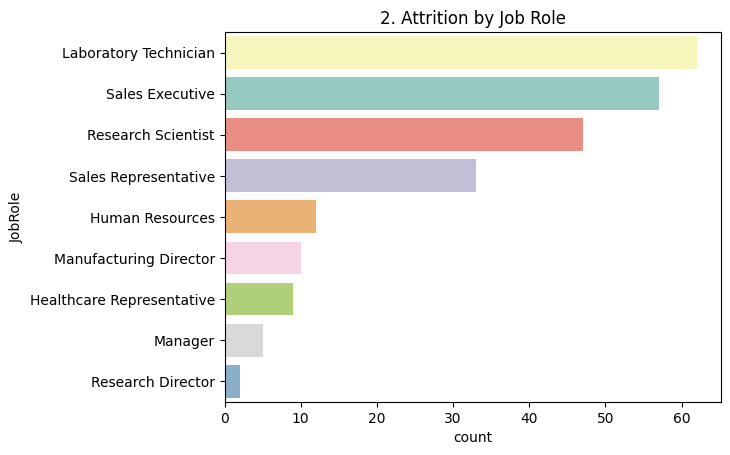

In [24]:
# 2. Attrition by Job Role
sns.countplot(data=df[df['Attrition'] == 'Yes'], y='JobRole', hue='JobRole', 
              order=df[df['Attrition'] == 'Yes']['JobRole'].value_counts().index,
              palette='Set3', legend=False)
plt.title("2. Attrition by Job Role")
plt.show()

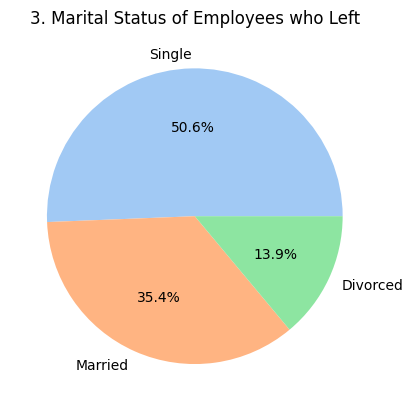

In [11]:
# 3. Marital Status vs. Attrition
pie_data = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()
pie_data.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("3. Marital Status of Employees who Left")
plt.ylabel('')
plt.show()



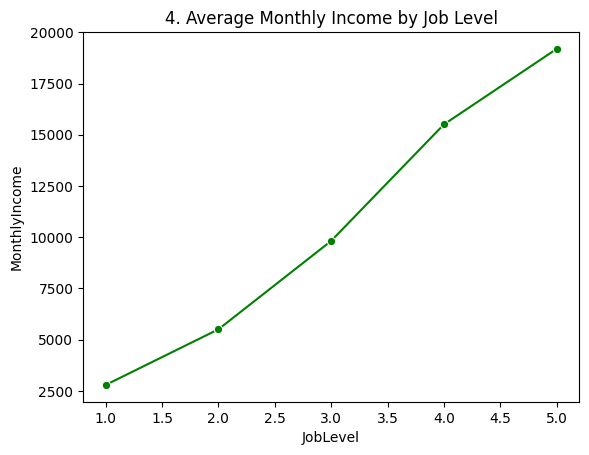

In [12]:
# 4. Distance From Home vs. Attrition
income_by_level = df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index()
sns.lineplot(data=income_by_level, x='JobLevel', y='MonthlyIncome', marker='o', color='green')
plt.title("4. Average Monthly Income by Job Level")
plt.show()



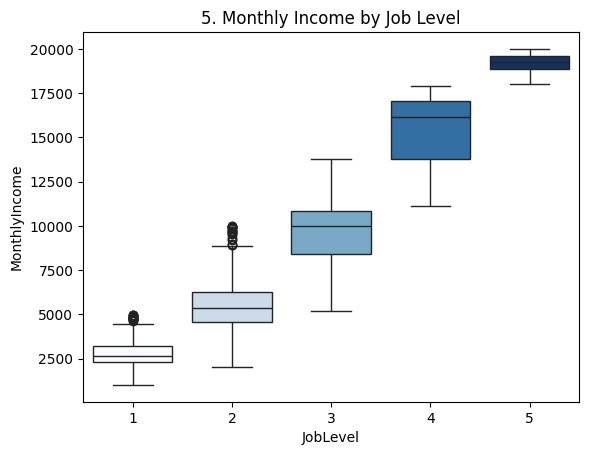

In [9]:
# 5. Monthly Income by Job Level
sns.boxplot(data=df, x='JobLevel', y='MonthlyIncome', hue='JobLevel', palette='Blues')
plt.title("5. Monthly Income by Job Level")
plt.legend().remove()
plt.show()


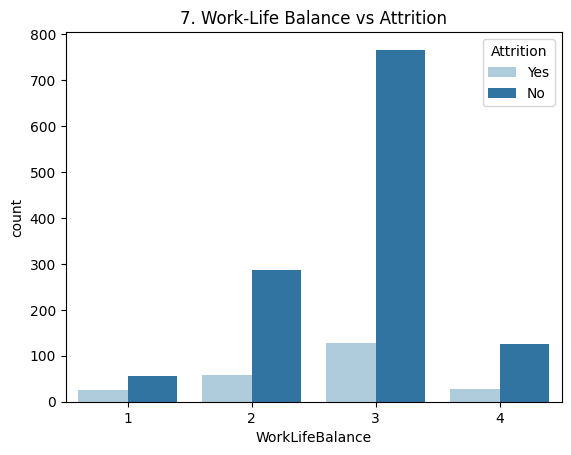

In [14]:
# 6. Overtime vs. Attrition
# 7. Work-Life Balance vs. Attrition
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='Paired')
plt.title("7. Work-Life Balance vs Attrition")
plt.show()


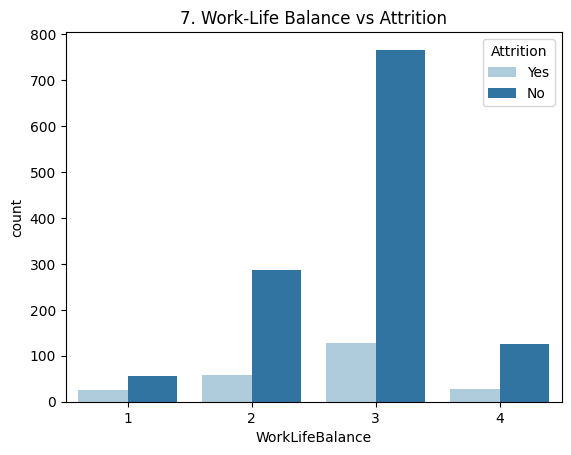

In [16]:
# 7. Work-Life Balance vs. Attrition
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='Paired')
plt.title("7. Work-Life Balance vs Attrition")
plt.show()


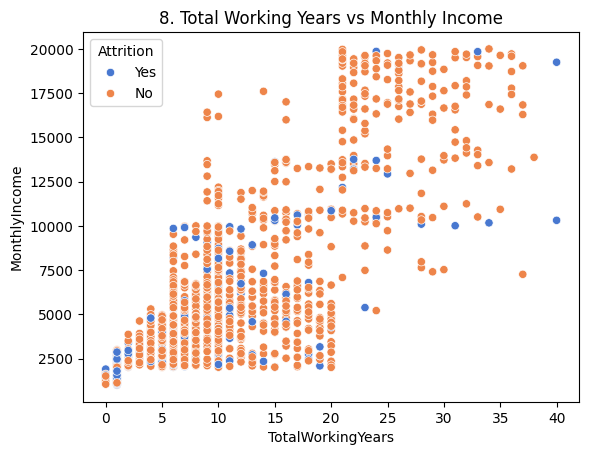

In [32]:

# 8. Total Working Years vs. Monthly Income
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', palette='muted')
plt.title("8. Total Working Years vs Monthly Income")
plt.show()

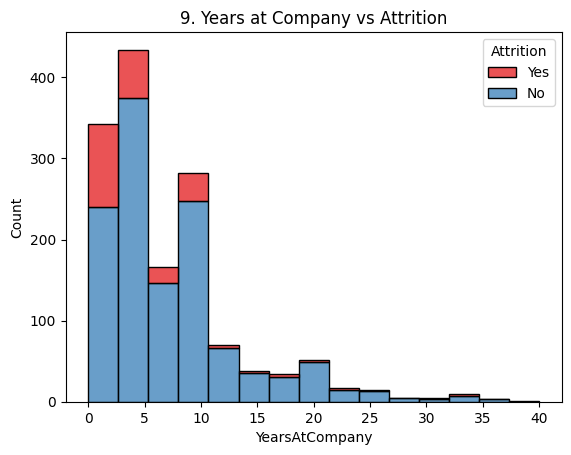

In [33]:
# 9. Years at Company vs. Attrition
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=15, palette='Set1')
plt.title("9. Years at Company vs Attrition")
plt.show()


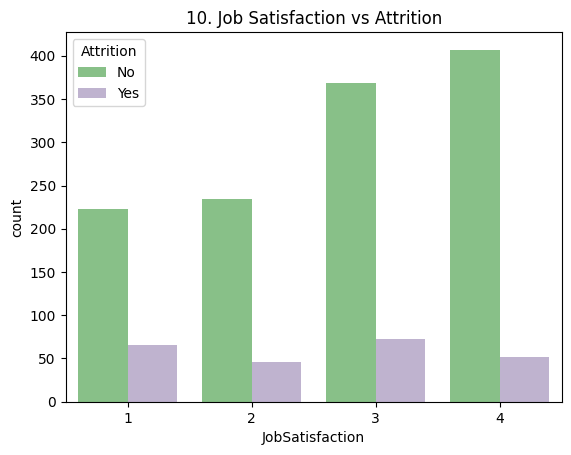

In [34]:
# 10. Job Satisfaction vs. Attrition
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Accent')
plt.title("10. Job Satisfaction vs Attrition")
plt.show()

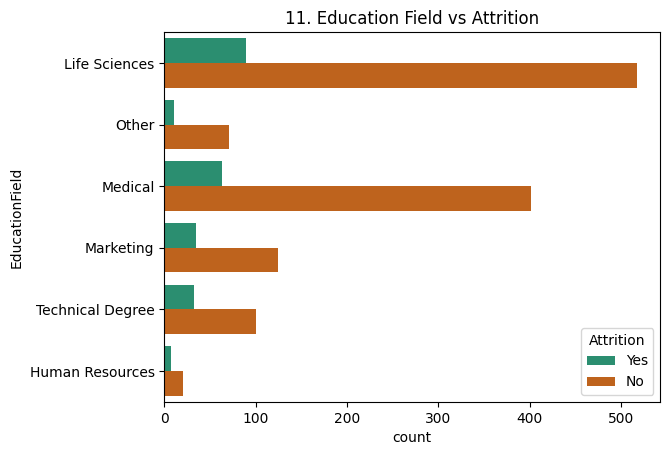

In [35]:
# 11. Education Field vs. Attrition
sns.countplot(data=df, y='EducationField', hue='Attrition', palette='Dark2')
plt.title("11. Education Field vs Attrition")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10984\3454344401.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


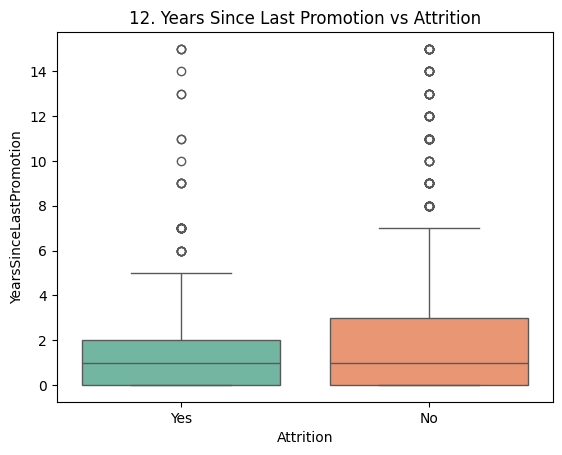

In [36]:
# 12. Years Since Last Promotion vs. Attrition
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion', hue='Attrition', palette='Set2')
plt.title("12. Years Since Last Promotion vs Attrition")
plt.legend().remove()
plt.show()

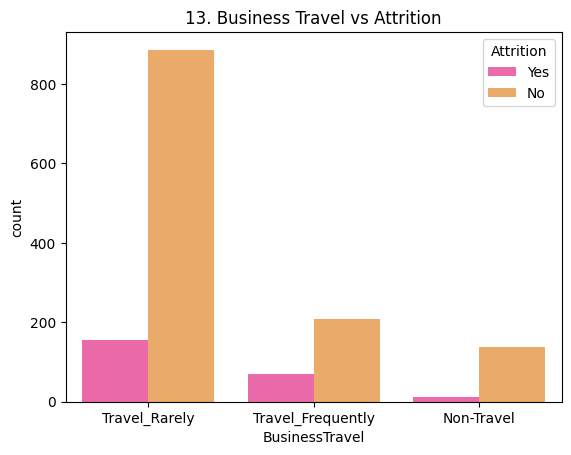

In [37]:

# 13. Business Travel vs. Attrition
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='spring')
plt.title("13. Business Travel vs Attrition")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13464\3586735971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_perf, x='TrainingTimesLastYear', y='PerformanceRating', palette='Oranges_r')


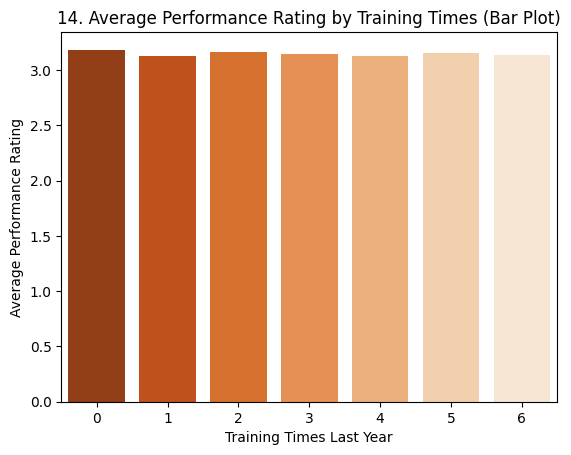

In [15]:
# 14. Training Times vs. Performance Rating
avg_perf = df.groupby('TrainingTimesLastYear')['PerformanceRating'].mean().reset_index()
sns.barplot(data=avg_perf, x='TrainingTimesLastYear', y='PerformanceRating', palette='Oranges_r')
plt.title("14. Average Performance Rating by Training Times (Bar Plot)")
plt.xlabel("Training Times Last Year")
plt.ylabel("Average Performance Rating")
plt.show()


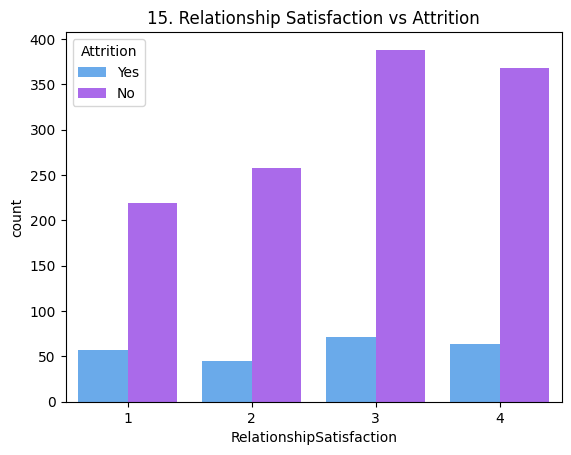

In [39]:
# 15. Relationship Satisfaction vs. Attrition
sns.countplot(data=df, x='RelationshipSatisfaction', hue='Attrition', palette='cool')
plt.title("15. Relationship Satisfaction vs Attrition")
plt.show()